In [1]:
# (1) 필요한 모듈 import하기
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
import pandas as pd

# (2) 데이터 준비
wine = load_wine()

# (3) 데이터 이해하기
X = wine.data # Feature Data 지정하기
print("Data, Feature :", X.shape)
y = wine.target # Label Data 지정하기
print(f"Target Names : {wine.target_names}")  # Target Names 출력

wine_df = pd.DataFrame(X)
wine_df.describe() # 데이타 Describe 

# (4) train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Data, Feature : (178, 13)
Target Names : ['class_0' 'class_1' 'class_2']


1. 178개의 샘플, 13개의 특성을 가지고 3가지 다른 품종의 와인을 분류  
   각 클래스는 이탈리아 같은 지역에서 재배된 다른 품종의 와인을 나타냄
2. 데이터셋 특징 :   
    - 모든 특성이 연속형 변수
    - 특성 간 단위는 다르지만 상관관계 존재
    - 비교적 균형 잡힌 클래스 분포


# (5)(6) 개별 모델 학습 및 평가

In [2]:
# 1. Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print("\nDecision Tree 모델 평가 결과:")
print(classification_report(y_test, dt_pred, digits=3))


Decision Tree 모델 평가 결과:
              precision    recall  f1-score   support

           0      0.929     0.929     0.929        14
           1      0.933     1.000     0.966        14
           2      1.000     0.875     0.933         8

    accuracy                          0.944        36
   macro avg      0.954     0.935     0.942        36
weighted avg      0.946     0.944     0.944        36



In [3]:
# 2.Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("\nRandom Forest 모델 평가 결과:")
print(classification_report(y_test, rf_pred, digits=3))


Random Forest 모델 평가 결과:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        14
           1      1.000     1.000     1.000        14
           2      1.000     1.000     1.000         8

    accuracy                          1.000        36
   macro avg      1.000     1.000     1.000        36
weighted avg      1.000     1.000     1.000        36



In [4]:
# 3. SVM
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
print("\nSVM 모델 평가 결과:")
print(classification_report(y_test, svm_pred, digits=3))


SVM 모델 평가 결과:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        14
           1      0.733     0.786     0.759        14
           2      0.571     0.500     0.533         8

    accuracy                          0.806        36
   macro avg      0.768     0.762     0.764        36
weighted avg      0.801     0.806     0.802        36



In [5]:
# 4. SGD Classifier
sgd = SGDClassifier(random_state=42)
sgd.fit(X_train, y_train)
sgd_pred = sgd.predict(X_test)
print("\nSGD 모델 평가 결과:")
print(classification_report(y_test, sgd_pred, digits=3))


SGD 모델 평가 결과:
              precision    recall  f1-score   support

           0      0.812     0.929     0.867        14
           1      0.650     0.929     0.765        14
           2      0.000     0.000     0.000         8

    accuracy                          0.722        36
   macro avg      0.487     0.619     0.544        36
weighted avg      0.569     0.722     0.634        36



c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [6]:
# 5. Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print("\nLogistic Regression 모델 평가 결과:")
print(classification_report(y_test, lr_pred, digits=3))


Logistic Regression 모델 평가 결과:
              precision    recall  f1-score   support

           0      1.000     0.929     0.963        14
           1      0.933     1.000     0.966        14
           2      1.000     1.000     1.000         8

    accuracy                          0.972        36
   macro avg      0.978     0.976     0.976        36
weighted avg      0.974     0.972     0.972        36



c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
# 모델 성능 비교 프로세스
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
models = {'Decision Tree': dt, 'Random Forest': rf, 'SVM': svm, 'SGD': sgd, 'Logistic Regression': lr}
results = []
for name, model in models.items():
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='weighted')
    recall = recall_score(y_test, pred, average='weighted')
    f1 = f1_score(y_test, pred, average='weighted')
    results.append({'Model': name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}) 
results_df = pd.DataFrame(results, index=range(1, 6))
print("\n와인 데이터 모델별 성능 비교:")
print(results_df.round(3))



와인 데이터 모델별 성능 비교:
                 Model  Accuracy  Precision  Recall  F1-score
1        Decision Tree     0.944      0.946   0.944     0.944
2        Random Forest     1.000      1.000   1.000     1.000
3                  SVM     0.806      0.801   0.806     0.802
4                  SGD     0.722      0.569   0.722     0.634
5  Logistic Regression     0.972      0.974   0.972     0.972


c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# 평가 비교

### 평가지표 선택 = Precision이 상대적으로 높음
- Precision = TP / (TP + FP)에서 FP(다른 품을 잘못 분류)가 적다는 의미
- "이 와인은 A품종이다"라고 예측할 때 실제로 맞을 확률
- 품질관리 차원에서 프리미엄 와인 분류 등 신뢰도 유지에 중요하다.

### 평가모델 선택 = Random Forest
- 손글씨의 선형적 구조와는 다르게 Wine 데이터 셋은 복잡한 비선형적 관계를 가지고 있고 특성간 상호작용이 복잡하다.
- Random Forest는 여러 특성들의 복잡한 상호작용을 잘 포착한다. 
- 와인 데이터는 13개의 연속형 특성으로 적합하다.
- 클래스간 상관관계가 다양하게 나올 수 있는데 RF를 통해 다른 특성 조합을 각 트리가 접근해 다양한 관점을 제공할 수 있다. 


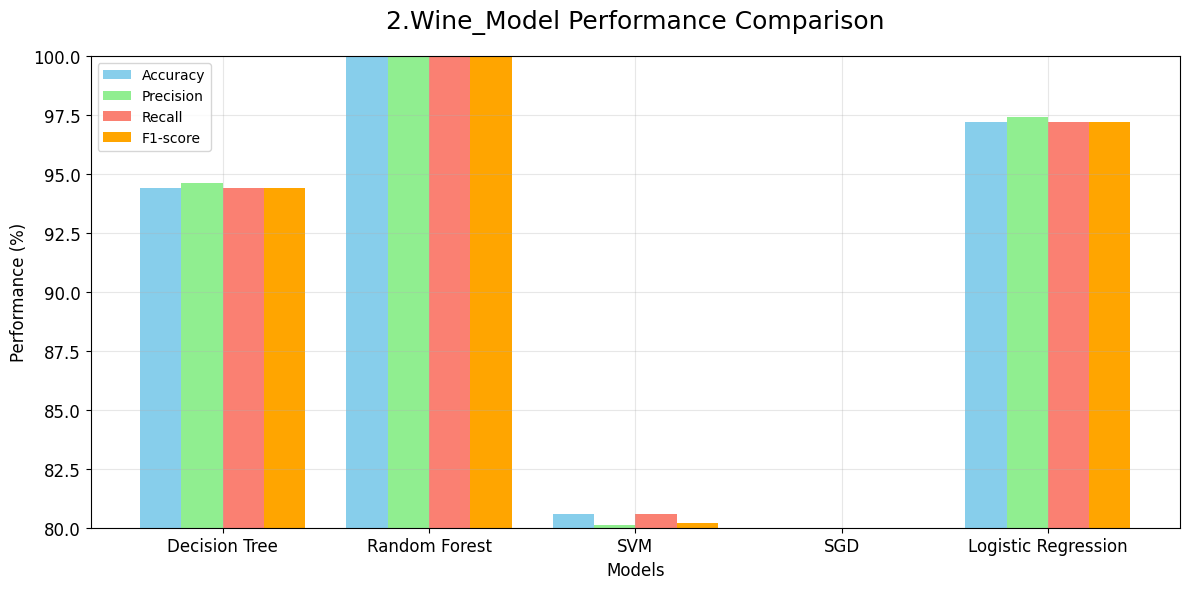

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    'Decision Tree': dt,
    'Random Forest': rf,
    'SVM': svm,
    'SGD': sgd,
    'Logistic Regression': lr
}

results = []
for name, model in models.items():
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='weighted')
    recall = recall_score(y_test, pred, average='weighted')
    f1 = f1_score(y_test, pred, average='weighted')
    
    results.append({
        'Model': name,
        'Accuracy': f'{accuracy*100:.1f}%',
        'Precision': f'{precision*100:.1f}%',
        'Recall': f'{recall*100:.1f}%',
        'F1-score': f'{f1*100:.1f}%'
    })

results_df = pd.DataFrame(results, index=range(1, 6))

numeric_columns = ['Accuracy', 'Precision', 'Recall', 'F1-score']
for col in numeric_columns:
    results_df[col] = results_df[col].str.rstrip('%').astype(float)

plt.figure(figsize=(12, 6))

x = np.arange(len(results_df))
width = 0.2

plt.bar(x - width*1.5, results_df['Accuracy'], width, label='Accuracy', color='skyblue')
plt.bar(x - width/2, results_df['Precision'], width, label='Precision', color='lightgreen')
plt.bar(x + width/2, results_df['Recall'], width, label='Recall', color='salmon')
plt.bar(x + width*1.5, results_df['F1-score'], width, label='F1-score', color='orange')

plt.xlabel('Models', fontsize=12)
plt.ylabel('Performance (%)', fontsize=12)
plt.title('2.Wine_Model Performance Comparison', fontsize=18, pad=20)
plt.xticks(x, results_df['Model'], rotation=0)
plt.legend(fontsize=10)  # 범례 폰트 크기 조정
plt.tick_params(axis='both', labelsize=12)  # x, y축 눈금 라벨 크기 조정
plt.grid(True, alpha=0.3)

plt.ylim(80, 100)

plt.tight_layout()

plt.show()